# Creación de Épocas con MNE-python (TOL)
## Creación de épocas

En esta cuarta parte se dividirá al registro en épocas. Es decir en los intérvalos de tiempo que nos interesa analizar.

## 0. Cargar paquetes

El paso cero es la carga de los paquetes. Es decir, la carga de las distintas funciones que vamos a estar utilizando en el script.

In [139]:
import mne

## 1. Carga de datos

Posteriormente, cargamos los datos en formato .fif que ya se encuentran **referenciados**, **filtrados**, **limpios** y que han pasado por el proceso del **ICA**.

Primero, colocamos el código del sujeto dentro de un objeto llamado *subject_id*. De esta forma, nos ahorramos tener cambiar el código del sujeto en todo el código <br>
Luego, colocamos el código de la tarea dentro de un objeto llamado *task*.<br>
Finalmente, dentro de la función  `mne.io.read()`vamos a escribir la ruta al archivo dentro de la computadora. Cargaremos estos datos en un objeto llamado **raw**

In [140]:
subject_id = "SAAV0009"
task = "TOL"

raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT_ICA.fif"), preload=True)

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\926302517.py:4: RuntimeWarning: This filename (../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT_ANNOT_ICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT_ICA.fif"), preload=True)


# 3. Colocar marcas

Al archivo con la señal neural vamos a agregarle las marcas de los estímulos. Es decir, vamos a marcar en que momento sucede cada uno de los estímulos de interés. En los datos de Resting este paso no es relevante.

Con `find_events()` vamos a almacenar las marcas dentro de un objeto llamado *events*. Con `print()` vamos a ver los primeros 5 eventos para asegurarnos de que aparezcan.

In [141]:
events = mne.find_events(raw)
print(events[:5])  # show the first 5

[[119552      0      2]
 [120692      0      3]
 [123608      0      2]
 [124169      0      3]
 [125458      0      2]]


Ahora creamos un objeto llamado *mapping* que contiene el nombre de cada marca. Con `annotations_from_events()`le ponemos ese nombre a cada marca.

In [142]:
mapping = {
    1: "Start",
    2: "Pick",
    3: "Release"
}
annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)
raw.set_annotations(annot_from_events)

<Raw | SAAV0009_TOL_REF_FILT_ANNOT_ICA.fif, 73 x 736256 (719.0 s), ~410.1 MB, data loaded>

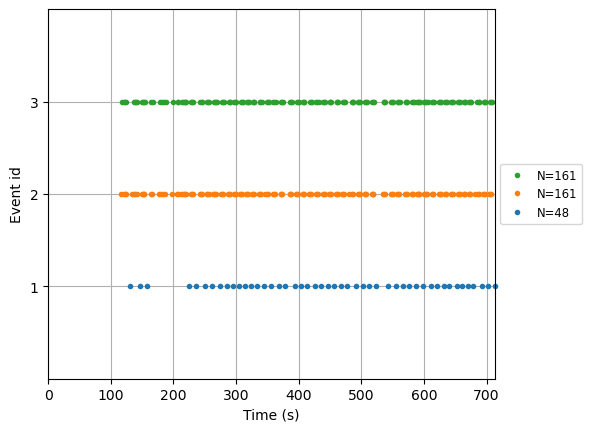

In [143]:
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)

In [144]:
raw.plot()

En la tarea de TOL, la marca de "start" se activa siempre 3 segundos después de que se apretó el botón de ok. Por lo tanto, tiene una marca más al final. Vamos a eliminarla para no confundirnos al momento de armar las épocas.

Primer vamos a almacenar todas las marcas de "start" en un mismo objeto llamado start_event.



In [145]:
start_event = mne.pick_events(events, include=1)
start_event = start_event[:-1, :]
len(start_event)

47

# 4. Crear épocas

Vamos a crear las épocas que nos interesan para TOL. Esto lo haremos a partir de la marca start_event.

In [146]:

epochs = mne.Epochs(raw, start_event, tmin=-0.5, tmax=3, reject_by_annotation=True, baseline = (-0.5,0), picks="eeg")

print(epochs)


<Epochs |  47 events (good & bad), -0.5 – 3 s, baseline -0.5 – 0 s, ~81 kB, data not loaded,
 '1': 47>


c:\Users\Fede\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


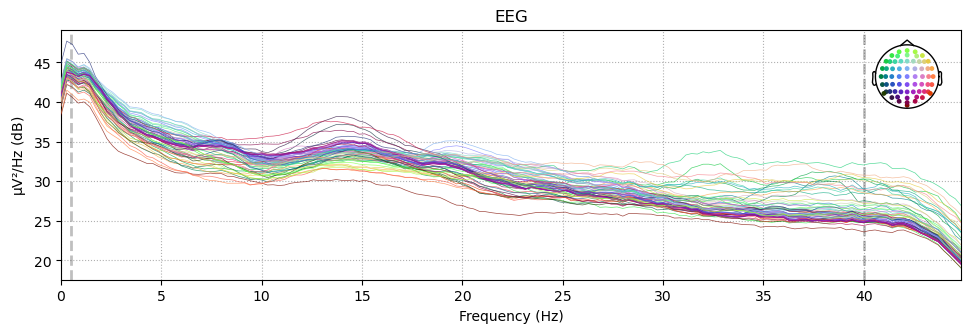

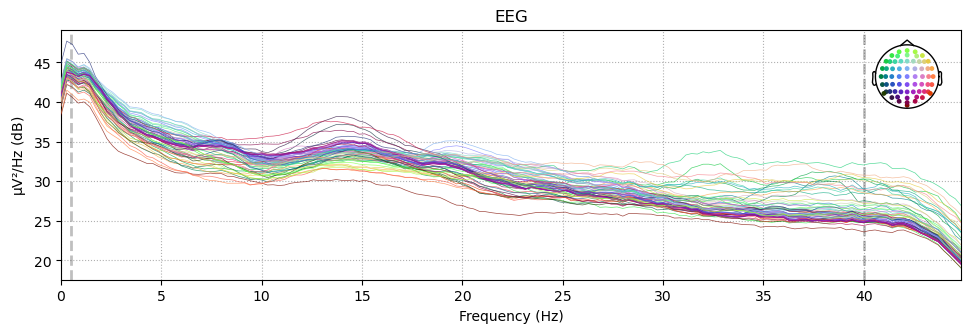

In [147]:
epochs.compute_psd(fmax=45).plot(picks="eeg", exclude="bads")

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:1: RuntimeWarning: Only one channel in group "Fpz"; cannot combine by method "mean".
  epochs.plot_image(picks="Fpz", combine = "mean")
C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Fpz", combine = "mean")


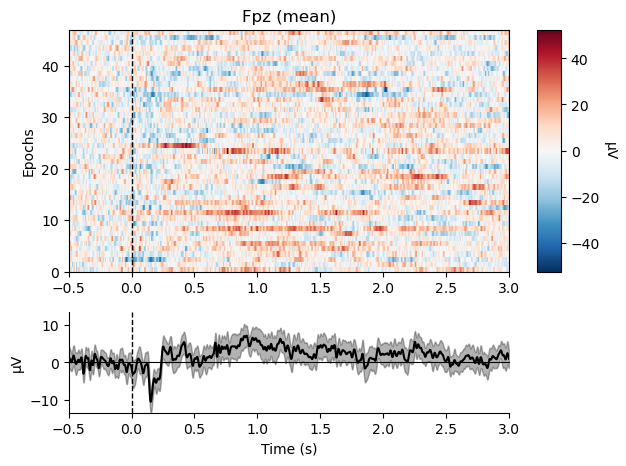

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:2: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  epochs.plot_image(picks="Cz", combine = "mean")
C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Cz", combine = "mean")


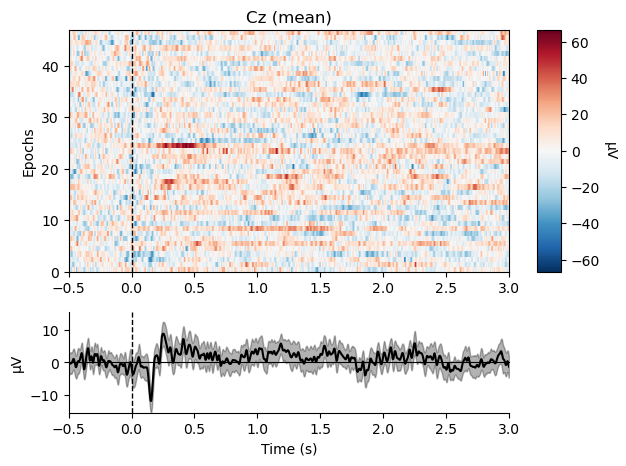

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:3: RuntimeWarning: Only one channel in group "Pz"; cannot combine by method "mean".
  epochs.plot_image(picks="Pz", combine = "mean")
C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Pz", combine = "mean")


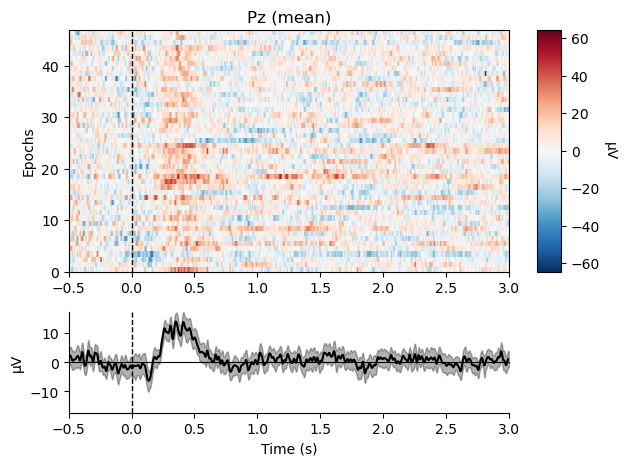

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:4: RuntimeWarning: Only one channel in group "Oz"; cannot combine by method "mean".
  epochs.plot_image(picks="Oz", combine = "mean")
C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\1129982236.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Oz", combine = "mean")


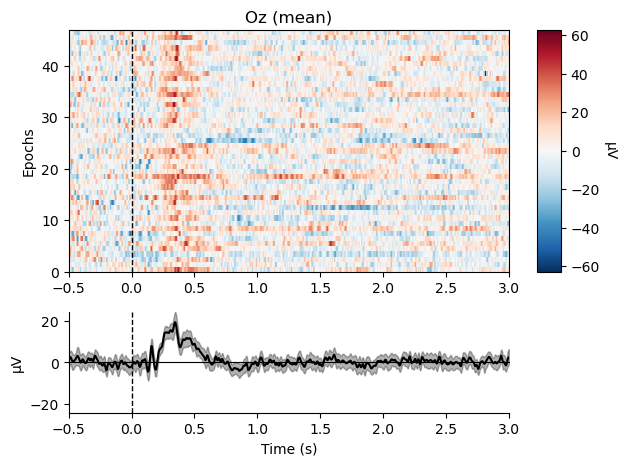

[<Figure size 640x480 with 3 Axes>]

In [148]:
epochs.plot_image(picks="Fpz", combine = "mean")
epochs.plot_image(picks="Cz", combine = "mean")
epochs.plot_image(picks="Pz", combine = "mean")
epochs.plot_image(picks="Oz", combine = "mean")

## 5. Guardar datos epoqueados

In [149]:
epochs.save(("../data/" + task + "/epochs/" + subject_id + "_" + task +"_epochs_05_3.fif"), overwrite=True)

C:\Users\Fede\AppData\Local\Temp\ipykernel_14416\3012428882.py:1: RuntimeWarning: This filename (../data/TOL/epochs/SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(("../data/" + task + "/epochs/" + subject_id + "_" + task +"_epochs_05_3.fif"), overwrite=True)
